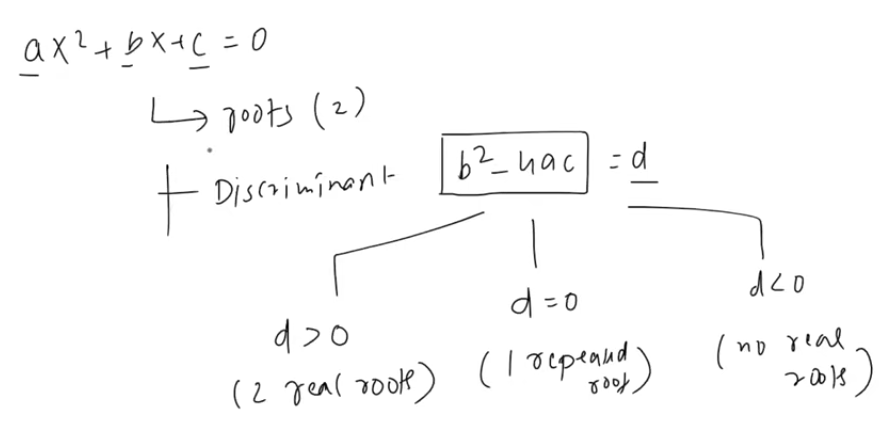

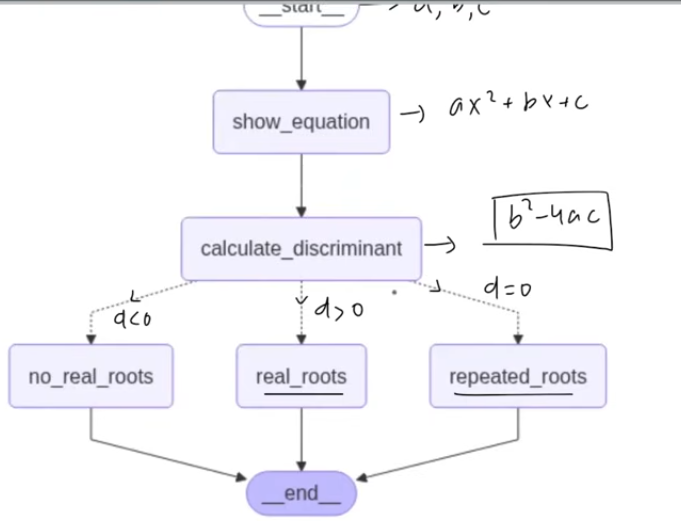

In [26]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict, Literal

In [27]:
class QuadState(TypedDict):

    a : int
    b : int
    c : int
    equation : str
    discriminant : float
    result : str


In [28]:
def show_equation(state: QuadState):
    equation = f"{state['a']}x2 + {state['b']}x + {state['c']}"
    return {"equation":equation}

def show_discriminant(state: QuadState):
    discriminant = state['b']**2 - (4*state['b']*state['c'])
    return {"discriminant":discriminant}

In [29]:
def real_roots(state: QuadState):
    root1 = (-state["b"] + state["discriminant"]**0.5)/(2*state["a"])
    root2 = (-state["b"] - state["discriminant"]**0.5)/(2*state["a"])

    result = f'The roots are {root1} and {root2}'

    return {'result': result}

def repeated_roots(state: QuadState):

    root = (-state["b"])/(2*state["a"])

    result = f'Only repeating root is {root}'

    return {'result': result}

def no_real_roots(state: QuadState):

    result = f'No real roots'

    return {'result': result}
def check_condition(state: QuadState) -> Literal["real_roots", "repeated_roots", "no_real_roots"]:

    if state['discriminant'] > 0:
        return "real_roots"
    elif state['discriminant'] == 0:
        return "repeated_roots"
    else:
        return "no_real_roots"

In [30]:
graph = StateGraph(QuadState)

graph.add_node("show_equation", show_equation)
graph.add_node("show_discriminant",show_discriminant)

graph.add_node('real_roots',real_roots)
graph.add_node('repeated_roots',repeated_roots)
graph.add_node('no_real_roots',no_real_roots)

graph.add_edge(START,"show_equation") 
graph.add_edge("show_equation","show_discriminant") 
graph.add_conditional_edges("show_discriminant", check_condition)

graph.add_edge("real_roots", END) 
graph.add_edge("repeated_roots", END) 
graph.add_edge("no_real_roots", END) 

workflow = graph.compile()

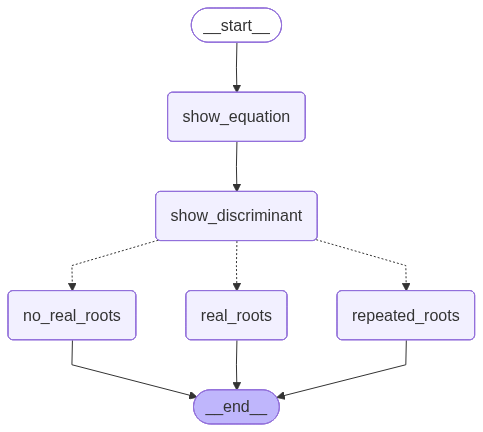

In [31]:
workflow

In [35]:
initial_state = { 'a' : 1 , 'b' : 1 , 'c' : 0}
workflow.invoke(initial_state)

{'a': 1,
 'b': 1,
 'c': 0,
 'equation': '1x2 + 1x + 0',
 'discriminant': 1,
 'result': 'The roots are 0.0 and -1.0'}